# Case Enem

**Problema:** como lidar com os NAs da coluna NU_NOTA_MT? se precisasse das notas desaparecidas dessa coluna, qual seria o tratamento?

**Observa√ß√µes:**
1. O n√∫mero de matr√≠cula √© referente ao Enem 2016, trata-se de uma m√°scara e n√£o o seu n√∫mero de inscri√ß√£o original no Enem. O mesmo NU_INSCRICAO para anos diferentes n√£o identifica o mesmo participante no exame, n√£o permite o acesso aos dados cadastrais como nome, endere√ßo, RG etc, nem identifica o mesmo participante em microdados de pesquisas diferentes.
2. A idade √© referente √† idade do inscrito em 31/12/2016. Idades inferiores a 10 anos e superiores a 100 anos est√£o com o campo vazio na base.

In [1]:
# importar as bibliotecas

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# ler as bases de dados

dicionario_colunas = pd.read_excel('dicionario_colunas_enem_alterado.xlsx')
base_enem = pd.read_excel('enem.xlsx')

## checagens e tratamento das bases

In [3]:
# checar o n√∫mero de linhas e de colunas de cada dataframe

pd.DataFrame({
    'base': ['base_enem', 'dicionario_colunas'],
    'n_colunas': [len(base_enem.columns), len(dicionario_colunas.columns)],
    'n_linhas': [len(base_enem), len(dicionario_colunas)]
})

base  n_colunas  n_linhas
0           base_enem         29     18306
1  dicionario_colunas          7       130

In [4]:
# verificar a base de dados dicionario_colunas

dicionario_colunas.head()

variavel                           descricao_variavel categoria  \
0      NU_INSCRICAO                        N√∫mero de inscri√ß√£o1        NaN   
1  SG_UF_RESIDENCIA  Sigla da Unidade da Federa√ß√£o de resid√™ncia       NaN   
2          NU_IDADE                                       Idade2       NaN   
3           TP_SEXO                                         Sexo         M   
4           TP_SEXO                                         Sexo         F   

  descricao_categoria  n_caracteres tipo_variavel     tipo_dado  
0                 NaN            12      Num√©rica  participante  
1                 NaN             2  Alfanum√©rica  participante  
2                 NaN             3      Num√©rica  participante  
3           Masculino             1  Alfanum√©rica  participante  
4           Feminino              1  Alfanum√©rica  participante

In [5]:
# verificar a base de dados do enem

base_enem.head(10)

NU_INSCRICAO SG_UF_RESIDENCIA  NU_IDADE  \
0  c4b29f22e75f5d4d83c329396a979ae24c1d295e               PA        27   
1  db4da599aab5bb08dce27094a35fd3e36cd0abce               RN        31   
2  4f88ee99c3603ec290163657c4de78f6446ec155               CE        24   
3  1653a4b2843735e9649b54a57c6146d3c8c2a5a4               GO        17   
4  be82fe3eb18eb2aa864fdf06c0bb45345fe3f4a0               MA        25   
5  c12c623f3dbeedb27ac2221ac7fe16ec242c5c14               PR        17   
6  9fa5581982f8076e7da74100bbef8990720f62ab               RJ        22   
7  e02921b7ab053178f65d4989c7f488dea7c06516               TO        21   
8  4496d0d42a729a789643e669e0f73b068777f1d7               MS        20   
9  2dd6e3c28210e2d22f9225b1bbaf120fca5e0d9d               MG        17   

  TP_SEXO  TP_COR_RACA  TP_NACIONALIDADE  TP_ST_CONCLUSAO  TP_ANO_CONCLUIU  \
0       M            3                 1                1               10   
1       F            1                 1                1               10   
2       F            4                 1                1                6   
3       F            1                 1                2                0   
4       M            1                 1                1                6   
5       M            3                 2                2                0   
6       F            2                 1                1                3   
7       F            3                 1                1                3   
8       F            3                 3                1                2   
9       F            1                 1                2                0   

   TP_ESCOLA  TP_ENSINO  ...  TP_STATUS_REDACAO  NU_NOTA_REDACAO  Q001  Q002  \
0          1        NaN  ...                1.0            760.0     C     G   
1          1        NaN  ...                NaN              NaN     E     E   
2          1        NaN  ...                NaN              NaN     B     B   
3          2        1.0  ...                1.0            580.0     H     D   
4          1        NaN  ...                NaN              NaN     C     D   
5          2        1.0  ...                1.0            460.0     B     D   
6          1        NaN  ...                1.0            480.0     C     C   
7          1        NaN  ...                1.0            580.0     B     E   
8          1        NaN  ...                1.0            580.0     E     E   
9          2        1.0  ...                1.0            600.0     D     D   

   Q006  Q024  Q025  Q026  Q027  Q047  
0     H     B     A     C     F     D  
1     C     A     A     B     E     A  
2     C     A     A     B     F     A  
3     D     C     B     C     D     A  
4     B     A     A     B     G     A  
5     C     B     A     A   NaN     A  
6     C     B     A     B     I     A  
7     B     B     A     A   NaN     A  
8     K     D     B     A   NaN     B  
9     B     A     A     A   NaN     A  

[10 rows x 29 columns]

In [6]:
# fazer o depara para saber o que significa cada coluna

get_dict = pd.DataFrame({
    'variavel': base_enem.columns.to_list()
})

get_dict = get_dict.merge(dicionario_colunas[['variavel', 'descricao_variavel']].drop_duplicates())

get_dict

variavel                                 descricao_variavel
0             NU_INSCRICAO                              N√∫mero de inscri√ß√£o1 
1         SG_UF_RESIDENCIA        Sigla da Unidade da Federa√ß√£o de resid√™ncia
2                 NU_IDADE                                             Idade2
3                  TP_SEXO                                               Sexo
4              TP_COR_RACA                                           Cor/ra√ßa
5         TP_NACIONALIDADE                                      Nacionalidade
6          TP_ST_CONCLUSAO              Situa√ß√£o de conclus√£o do Ensino M√©dio
7          TP_ANO_CONCLUIU                   Ano de Conclus√£o do Ensino M√©dio
8                TP_ESCOLA                     Tipo de escola do Ensino M√©dio
9                TP_ENSINO  Tipo de institui√ß√£o que concluiu ou concluir√° ...
10  TP_DEPENDENCIA_ADM_ESC                Depend√™ncia administrativa (Escola)
11          TP_PRESENCA_CN  Presen√ßa na prova objetiva de Ci√™ncias da Natu...
12          TP_PRESENCA_CH     Presen√ßa na prova objetiva de Ci√™ncias Humanas
13          TP_PRESENCA_LC  Presen√ßa na prova objetiva de Linguagens e C√≥d...
14              NU_NOTA_CN              Nota da prova de Ci√™ncias da Natureza
15              NU_NOTA_CH                  Nota da prova de Ci√™ncias Humanas
16              NU_NOTA_LC              Nota da prova de Linguagens e C√≥digos
17              NU_NOTA_MT                        Nota da prova de Matem√°tica
18               TP_LINGUA                                L√≠ngua Estrangeira 
19       TP_STATUS_REDACAO                Situa√ß√£o da reda√ß√£o do participante
20         NU_NOTA_REDACAO                           Nota da prova de reda√ß√£o
21                    Q001  At√© que s√©rie seu pai, ou o homem respons√°vel ...
22                    Q002  At√© que s√©rie sua m√£e, ou a mulher respons√°vel...
23                    Q006  Qual √© a renda mensal de sua fam√≠lia? (Some a ...
24                    Q024                  Na sua resid√™ncia tem computador?
25                    Q026    Voc√™ exerce ou j√° exerceu atividade remunerada?
26                    Q027  Com que idade voc√™ come√ßou a exercer uma ativi...
27                    Q047  Em que tipo de escola voc√™ frequentou o Ensino...

## an√°lise explorat√≥ria

In [7]:
# o que significa a coluna a ser investigada?

dicionario_colunas[dicionario_colunas['variavel'] == 'NU_NOTA_MT']

variavel           descricao_variavel categoria descricao_categoria  \
58  NU_NOTA_MT  Nota da prova de Matem√°tica       NaN                 NaN   

    n_caracteres tipo_variavel       tipo_dado  
58             9      Num√©rica  prova objetiva

### verifica√ß√£o de NAs

<AxesSubplot:>

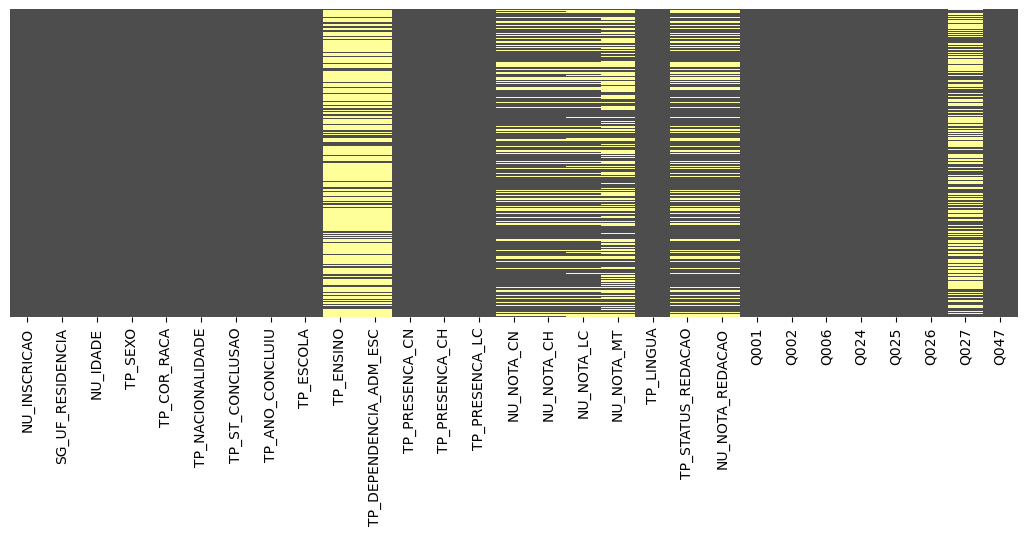

In [8]:
# verificarquais s√£o os NAs das linhas na base_enem

plt.figure(figsize = (13,4))
sns.heatmap(base_enem.isnull(), yticklabels = False, cbar = False, cmap = ['#4d4d4d', '#ffff99'])

aparentemente a coluna da nota de matem√°tica tem mais valores vazios do que as colunas das notas das outras √°reas de conhecimento.

em 2016, as provas de cada √°rea do conhecimento foram divididas nos seguintes dias:
- s√°bado: ci√™ncias humanas (CH) + ci√™ncias da natureza (CN)
- domingo: matem√°tica (MT) + linguagens e c√≥digos (LC) + Reda√ß√£o

dessa forma, faz sentido que as observa√ß√µes vazias para CN sejam as mesmas do que para CH.

tamb√©m faz sentido que algumas notas vazias de LC n√£o estejam vazias para CN e CH, pois como esta prova foi em outro dia, algumas pessoas podem n√£o ter comparecido.

no entanto, n√£o faz sentido que tenham muito mais notas vazias de matem√°tica que n√£o est√£o vazias em LC, uma vez que estas foram realizadas no mesmo dia; caso a pessoa n√£o tenha marcado as quest√µes da prova por exemplo, a nota dela deveria estar como 0.

os NAs da reda√ß√£o batem com os de LC

In [10]:
# quais as notas de LC das pessoas que est√£o com valor nulo de matem√°tica mas n√£o nulos na de portugu√™s?

nota_lc_na_mt = base_enem
nota_lc_na_mt['sem_nota_mat'] = nota_lc_na_mt['NU_NOTA_MT'].isnull()
nota_lc_na_mt['sem_nota_lc'] = nota_lc_na_mt['NU_NOTA_LC'].isnull()

nota_lc_na_mt = nota_lc_na_mt[nota_lc_na_mt['sem_nota_mat'] == True]
nota_lc_na_mt = nota_lc_na_mt[nota_lc_na_mt['sem_nota_lc'] == False]
nota_lc_na_mt['NU_NOTA_LC'].sort_values()

5343       0.0
7063       0.0
16487    343.7
6890     346.3
8086     348.2
         ...  
2376     688.2
3664     697.1
14398    698.7
8293     706.7
12489    708.9
Name: NU_NOTA_LC, Length: 3377, dtype: float64

In [11]:
# as pessoas com nota em pt mas n√£o em matem√°tica n√£o tiraram 0 (exceto 2)

# o que significam as colunas que possuem muitos valores vazios?

print('TP_ENSINO =', get_dict[get_dict['variavel'] == 'TP_ENSINO']['descricao_variavel'].to_list())
print('TP_DEPENDENCIA_ADM_ESC =', get_dict[get_dict['variavel'] == 'TP_DEPENDENCIA_ADM_ESC']['descricao_variavel'].to_list())
print('Q027 =', get_dict[get_dict['variavel'] == 'Q027']['descricao_variavel'].to_list())

TP_ENSINO = ['Tipo de institui√ß√£o que concluiu ou concluir√° o Ensino M√©dio ']
TP_DEPENDENCIA_ADM_ESC = ['Depend√™ncia administrativa (Escola)']
Q027 = ['Com que idade voc√™ come√ßou a exercer uma atividade remunerada?']


In [12]:
# tem pessoas que est√£o com presen√ßa 1 para CH e 0 para CN e vice versa?

base_enem.groupby(['TP_PRESENCA_CH', 'TP_PRESENCA_CN']).count()['NU_INSCRICAO'].to_frame()

NU_INSCRICAO
TP_PRESENCA_CH TP_PRESENCA_CN              
0              0                       4514
1              1                      13783
2              2                          9

In [13]:
# a mesma resposta de presen√ßa para CH √© a de presen√ßa para CN para todos os candidatos

# o que significa presen√ßa 2?

dicionario_colunas[(dicionario_colunas['variavel'] == 'TP_PRESENCA_CH')][['categoria', 'descricao_categoria']]

categoria descricao_categoria
46         0      Faltou √† prova
47         1   Presente na prova
48         2  Eliminado na prova

In [14]:
# as pessoas que est√£o sem nota de CH s√£o as mesmas que n√£o compareceram?

check_nota_ausencia = base_enem
check_nota_ausencia['sem_nota'] = check_nota_ausencia['NU_NOTA_CH'].isnull()

check_nota_ausencia.groupby(['sem_nota', 'TP_PRESENCA_CH']).count()['NU_INSCRICAO'].to_frame().reset_index()

sem_nota  TP_PRESENCA_CH  NU_INSCRICAO
0     False               1         13783
1      True               0          4514
2      True               2             9

In [15]:
# s√≥ quem n√£o compareceu est√° sem nota
# fazer a mesma confer√™ncia para portugu√™s

check_nota_ausencia['sem_nota_lc'] = check_nota_ausencia['NU_NOTA_LC'].isnull()

check_nota_ausencia.groupby(['sem_nota_lc', 'TP_PRESENCA_LC']).count()['NU_INSCRICAO'].to_frame().reset_index()

sem_nota_lc  TP_PRESENCA_LC  NU_INSCRICAO
0        False               1         13510
1         True               0          4787
2         True               2             9

In [16]:
# o mesmo foi confirmado para LC

# qual o percentual de pessoas que est√£o sem a nota de matem√°tica e de portugu√™s?

print('percentual sem nota de matem√°tica =', round( base_enem['NU_NOTA_MT'].isnull().sum() * 100/ base_enem['NU_INSCRICAO'].count(), 1), '%')
print('percentual sem nota de portugues =', round(base_enem['NU_NOTA_LC'].isnull().sum() * 100/ base_enem['NU_INSCRICAO'].count(), 1), '%')

percentual sem nota de matem√°tica = 44.6 %
percentual sem nota de portugues = 26.2 %


In [17]:
# s√≥ de curiosidade: quais os tipos de situa√ß√£o da reda√ß√£o?

status_redacao = dicionario_colunas[dicionario_colunas['variavel'] == 'TP_STATUS_REDACAO'][['categoria', 'descricao_categoria']]

status_redacao['categoria'] = status_redacao['categoria'].astype(float)

base_enem.groupby('TP_STATUS_REDACAO').count()['NU_INSCRICAO'].to_frame().reset_index().merge(status_redacao, left_on = 'TP_STATUS_REDACAO', right_on = 'categoria')

TP_STATUS_REDACAO  NU_INSCRICAO  categoria      descricao_categoria
0                1.0         13195        1.0            Sem problemas
1                2.0             3        2.0                  Anulada
2                3.0            17        3.0    C√≥pia Texto Motivador
3                4.0           133        4.0                Em Branco
4                5.0             9        5.0    Fere Direitos Humanos
5                6.0           105        6.0             Fuga ao tema
6                7.0             7        7.0  N√£o atendimento ao tipo
7                8.0            12        8.0       Texto insuficiente
8                9.0            29        9.0       Parte desconectada

### de quais vari√°veis verificar a distribui√ß√£o?

olhar a distribui√ß√£o: 
- de inscritos
- comparar o perfil de quem foi e de quem n√£o foi no primeiro dia
- comparar o perfil de quem foi e de quem n√£o foi no segundo dia
- observar o perfil de quem tem n√£o tem a nota de matem√°tica mas tem a de portugu√™s

In [18]:
# criar a coluna se tem ou n√£o a nota de matem√°tica

base_enem['tem_nota_mat'] = base_enem['NU_NOTA_MT'].isnull()

In [19]:
# olhar novamente o que significa cada vari√°vel e selecionar as que fazem sentido

get_dict

variavel                                 descricao_variavel
0             NU_INSCRICAO                              N√∫mero de inscri√ß√£o1 
1         SG_UF_RESIDENCIA        Sigla da Unidade da Federa√ß√£o de resid√™ncia
2                 NU_IDADE                                             Idade2
3                  TP_SEXO                                               Sexo
4              TP_COR_RACA                                           Cor/ra√ßa
5         TP_NACIONALIDADE                                      Nacionalidade
6          TP_ST_CONCLUSAO              Situa√ß√£o de conclus√£o do Ensino M√©dio
7          TP_ANO_CONCLUIU                   Ano de Conclus√£o do Ensino M√©dio
8                TP_ESCOLA                     Tipo de escola do Ensino M√©dio
9                TP_ENSINO  Tipo de institui√ß√£o que concluiu ou concluir√° ...
10  TP_DEPENDENCIA_ADM_ESC                Depend√™ncia administrativa (Escola)
11          TP_PRESENCA_CN  Presen√ßa na prova objetiva de Ci√™ncias da Natu...
12          TP_PRESENCA_CH     Presen√ßa na prova objetiva de Ci√™ncias Humanas
13          TP_PRESENCA_LC  Presen√ßa na prova objetiva de Linguagens e C√≥d...
14              NU_NOTA_CN              Nota da prova de Ci√™ncias da Natureza
15              NU_NOTA_CH                  Nota da prova de Ci√™ncias Humanas
16              NU_NOTA_LC              Nota da prova de Linguagens e C√≥digos
17              NU_NOTA_MT                        Nota da prova de Matem√°tica
18               TP_LINGUA                                L√≠ngua Estrangeira 
19       TP_STATUS_REDACAO                Situa√ß√£o da reda√ß√£o do participante
20         NU_NOTA_REDACAO                           Nota da prova de reda√ß√£o
21                    Q001  At√© que s√©rie seu pai, ou o homem respons√°vel ...
22                    Q002  At√© que s√©rie sua m√£e, ou a mulher respons√°vel...
23                    Q006  Qual √© a renda mensal de sua fam√≠lia? (Some a ...
24                    Q024                  Na sua resid√™ncia tem computador?
25                    Q026    Voc√™ exerce ou j√° exerceu atividade remunerada?
26                    Q027  Com que idade voc√™ come√ßou a exercer uma ativi...
27                    Q047  Em que tipo de escola voc√™ frequentou o Ensino...

como visto anteriormente TP_ENSINO e TP_DEPENDENCIA_ADM_ESC possuem muitos valores vazios

tendo isto em vista, as vari√°veis a terem a distribui√ß√£o analisada s√£o:

SG_UF_RESIDENCIA, NU_IDADE, TP_SEXO, TP_COR_RACA, TP_NACIONALIDADE, TP_ST_CONCLUSAO, TP_ESCOLA

In [20]:
# quais os tipos de escola?

dicionario_colunas[dicionario_colunas['variavel'] == 'TP_ESCOLA']

variavel              descricao_variavel categoria descricao_categoria  \
32  TP_ESCOLA  Tipo de escola do Ensino M√©dio         1       N√£o Respondeu   
33  TP_ESCOLA  Tipo de escola do Ensino M√©dio         2             P√∫blica   
34  TP_ESCOLA  Tipo de escola do Ensino M√©dio         3             Privada   
35  TP_ESCOLA  Tipo de escola do Ensino M√©dio         4            Exterior   

    n_caracteres tipo_variavel     tipo_dado  
32             1      Num√©rica  participante  
33             1      Num√©rica  participante  
34             1      Num√©rica  participante  
35             1      Num√©rica  participante

### distribui√ß√£o de estados

<AxesSubplot:>

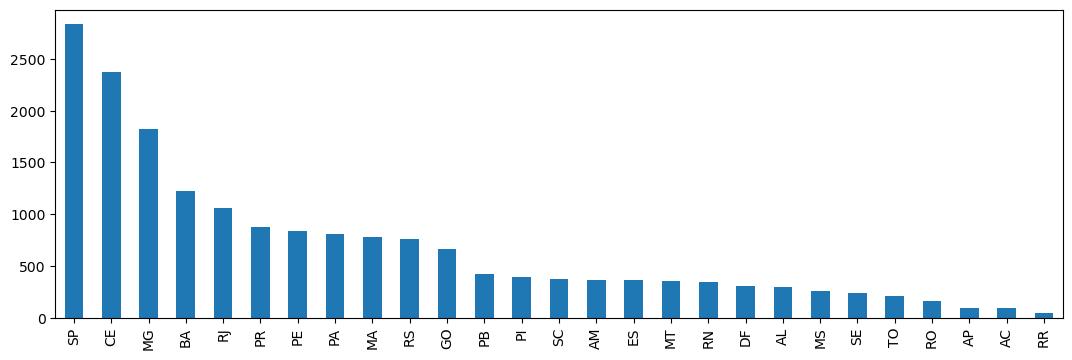

In [21]:
plt.figure(figsize = (13,4))
base_enem['SG_UF_RESIDENCIA'].value_counts().plot.bar()

por que tem tanta gente assim do Cear√°? A base est√° enviesada? ela √© representativa dos inscritos reais do enem 2016?

[inscritos por estado no enem 2016](https://blogs.interior.ne10.uol.com.br/intensivao/2016/10/13/pernambuco-e-o-sexto-estado-com-mais-inscritos-no-enem-2016/)

olhando para a lista, Cear√° foi o 5¬∫ estado com mais inscritos no Enem de 2016, e na base tem proporcionalmente muito mais pessoas do Cear√°

rank | top inscritos real | top inscritos base | top estados mais populosos
--- | --- | --- | ---
1 | SP | SP | SP
2 | MG | CE üî∫ | MG
3 | BA | MG  | RJ
4 | RJ | BA | BA
5 | CE üî∏ | RJ | RS
6 | PE | PR üî∫ | PR
7 | PA | PE | PE
8 | RS | PA | CE
9 | PR üî∏ | MA üî∫ | PA 
10 | MA üî∏ | RS | MA

teria que olhar certinha a propor√ß√£o de cada estado para ver o quanto a base est√° enviesada

olhando para o ranking de estados mais populosos, h√° uma tend√™ncia de que, olhando proporcionalmente dentro dos estados, mais pessoas do nordeste se inscrevam do que as pessoas do sul 

se fosse este um ponto, teria que ver a distribui√ß√£o de faixas et√°rias dentro de cada estado 

### distribui√ß√£o de idade

In [22]:
# verificando o tipo da vari√°vel de idade

type(base_enem['NU_IDADE'].iloc[0])

numpy.int64

<AxesSubplot:xlabel='NU_IDADE', ylabel='Count'>

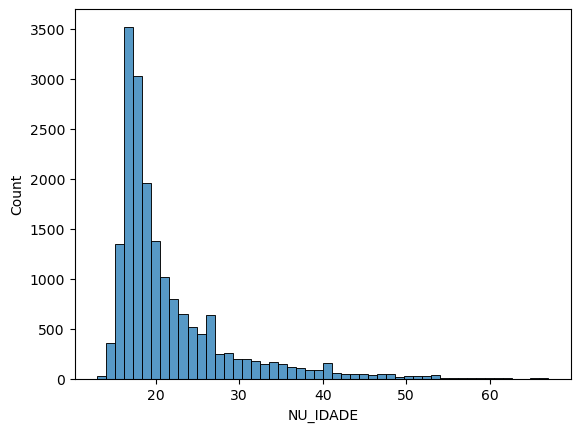

In [26]:
# a idade √© um n√∫mero inteiro
# olhando a distribui√ß√£o:

sns.histplot(x = 'NU_IDADE', data = base_enem, bins = 50)

<AxesSubplot:xlabel='idade_cat', ylabel='NU_IDADE'>

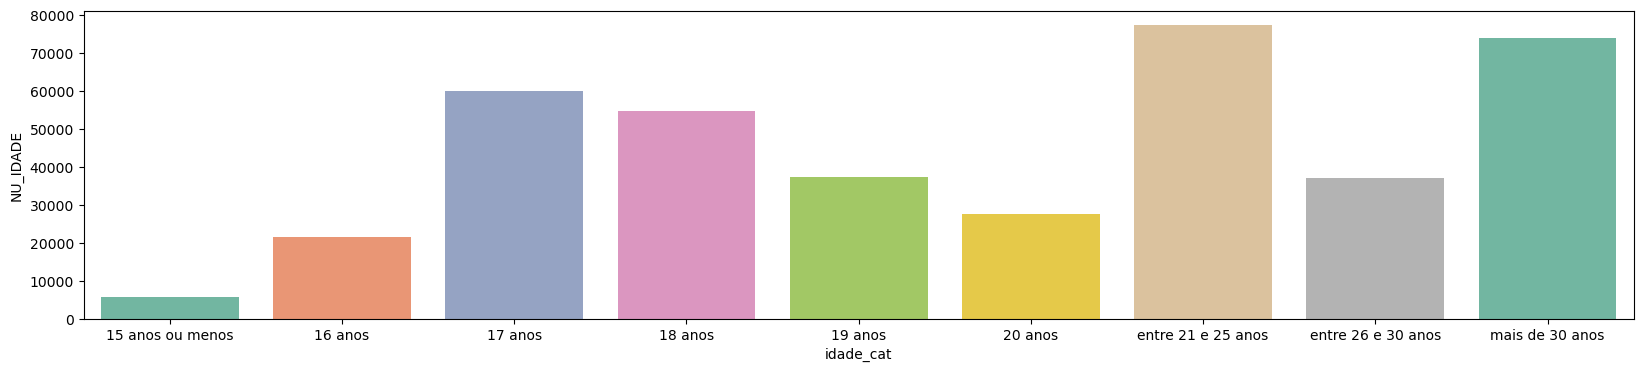

In [27]:
# categorizando a idade

def idade_cat(x):
    if x <= 15:
        return "15 anos ou menos"
    elif x == 16:
        return "16 anos"
    elif x == 17:
        return "17 anos"
    elif x == 18:
        return "18 anos"
    elif x == 19:
        return "19 anos"
    elif x == 20:
        return "20 anos"
    elif x <= 25:
        return "entre 21 e 25 anos"
    elif x <= 30:
        return "entre 26 e 30 anos"
    else:
        return "mais de 30 anos"

# aplicando a fun√ß√£o na base_enem
base_enem['idade_cat'] = base_enem['NU_IDADE'].apply(idade_cat)

# plotando o gr√°fico da distribui√ß√£o das idades categ√≥ricas
df_idade_cat = base_enem.groupby('idade_cat').sum()['NU_IDADE'].to_frame().reset_index()
plt.figure(figsize = (20, 4))
sns.barplot(data = df_idade_cat, x = 'idade_cat', y = 'NU_IDADE', palette = 'Set2')

### distribui√ß√£o de sexo

In [51]:
sexo = base_enem['TP_SEXO'].value_counts().to_frame()
sexo['perc'] = base_enem['TP_SEXO'] * 100 / len(base_enem)

TypeError: unsupported operand type(s) for /: 'str' and 'int'

TypeError: Neither the `x` nor `y` variable appears to be numeric.

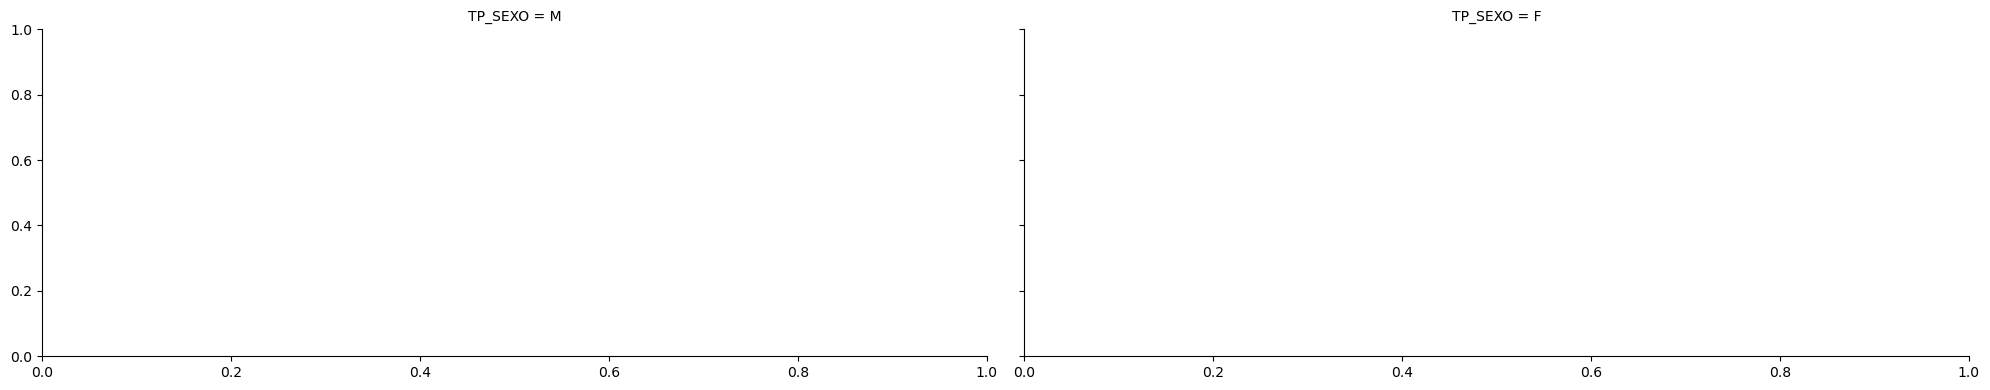

In [50]:
sexo_idade = base_enem.groupby(['TP_SEXO', 'idade_cat']).value_counts()

g = sns.FacetGrid(data = base_enem, col = "TP_SEXO", height = 4, aspect = 2.5)
g.map(sns.barplot, x = "idade_cat")

### distribui√ß√£o de ra√ßa/cor

In [ ]:
TP_COR_RACA

### distribui√ß√£o de nacionalidade

In [ ]:
TP_NACIONALIDADE

### distribui√ß√£o da situa√ß√£o de conclus√£o do ensino m√©dio

In [ ]:
SITUACAO_CONCLUS√ÉO

### an√°lise das respostas do question√°rio socioecon√¥mico

In [23]:
get_dict[get_dict['variavel'].str.startswith('Q')]

variavel                                 descricao_variavel
21     Q001  At√© que s√©rie seu pai, ou o homem respons√°vel ...
22     Q002  At√© que s√©rie sua m√£e, ou a mulher respons√°vel...
23     Q006  Qual √© a renda mensal de sua fam√≠lia? (Some a ...
24     Q024                  Na sua resid√™ncia tem computador?
25     Q026    Voc√™ exerce ou j√° exerceu atividade remunerada?
26     Q027  Com que idade voc√™ come√ßou a exercer uma ativi...
27     Q047  Em que tipo de escola voc√™ frequentou o Ensino...